# Matplotlib or Seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("./car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [31]:
total = data[["Make", "Price"]].groupby("Make").sum()
total

,Price
Make,
BMW,2501927.0
Honda,4107844.0
Nissan,2391288.0
Toyota,5563201.0


# Pie Chart

## Simple Pie Chart

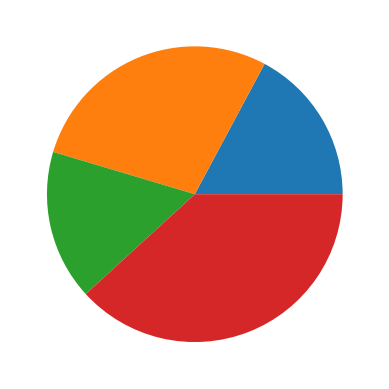

In [6]:
plt.pie(total.Price)
plt.show()

## Pie Chart with Label

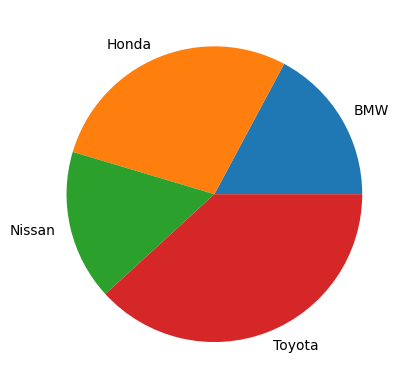

In [7]:
plt.pie(total.Price, labels = total.index)
plt.show()

## Hatch

(https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html)

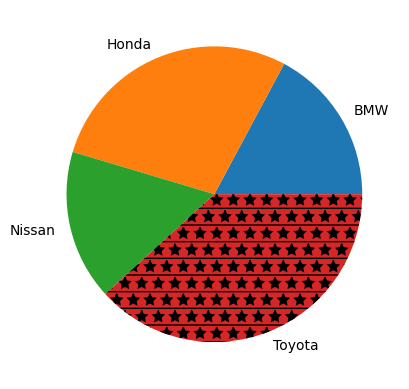

In [12]:
plt.pie(total.Price, labels = total.index, hatch=["","","","-*"])
plt.show()

## Percentage

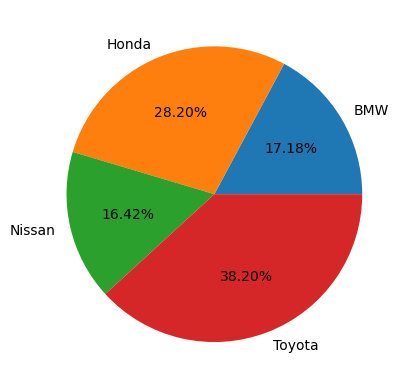

In [13]:
plt.pie(total.Price, labels = total.index, autopct="%.2f%%")
plt.show()

## Coloring

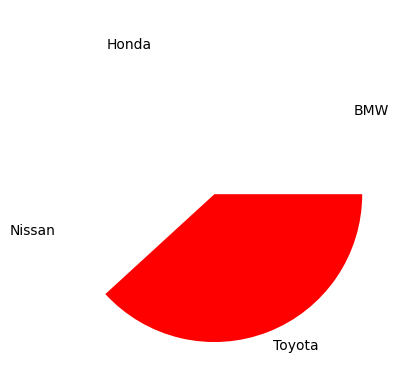

In [14]:
plt.pie(total.Price, labels = total.index, colors=["white", "white", "white","red"])
plt.show()

## Rotating

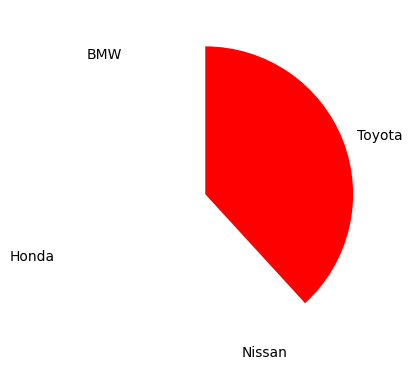

In [16]:
plt.pie(total.Price, labels = total.index, startangle=90, colors=["white", "white", "white","red"])
plt.show()

# Bar chart

In [19]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


## Basic Bar Chart

In [51]:
total = pd.DataFrame({
    "Price": [100, 1000, 10000],
    "Make": ["BMW", "Toyota", "Lexus"]
})

In [44]:
total

,Price,Make
0,100,BMW
1,1000,Toyota
2,1000000000000000,Lexus


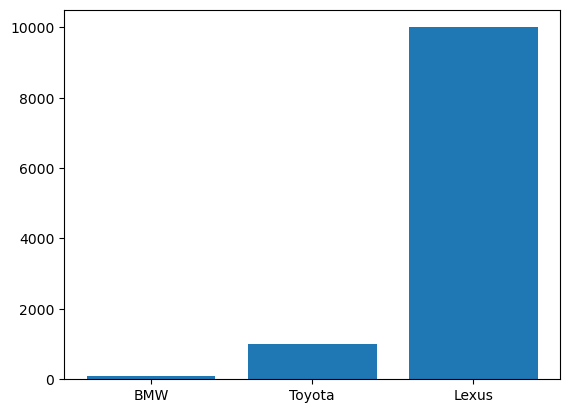

In [56]:
plt.bar(total.Make,total.Price)
plt.show()

In [3]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [4]:
car_maker_sales = data[["Make", "Price"]]
groupbymaker_sales.head()

,Make,Price
0,Honda,15323.0
1,BMW,19943.0
2,Honda,28343.0
3,Toyota,13434.0
4,Nissan,14043.0


In [10]:
total = car_maker_sales.groupby("Make").sum()
total

,Price
Make,
BMW,2501927.0
Honda,4107844.0
Nissan,2391288.0
Toyota,5563201.0


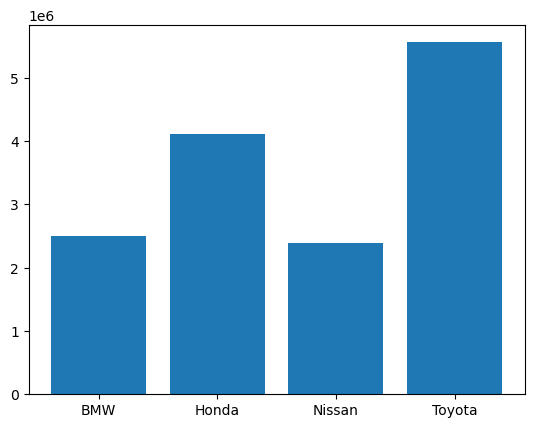

In [15]:
plt.bar(total.index,total.Price)
plt.show()

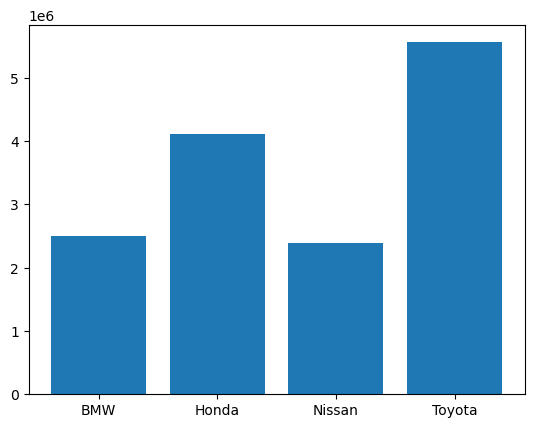

In [49]:
total = data[["Make", "Price"]].groupby("Make").sum()
plt.bar(height= total.Price, x=total.index)
plt.show()

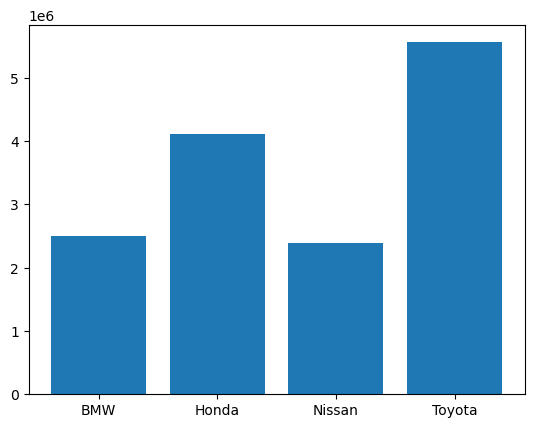

In [14]:
plt.bar(height= total.Price, x=total.index)
plt.show()

In [20]:
total["bar_color"] = ["red", "blue", "green", "black"]
total

,Price,bar_color
Make,,
BMW,2501927.0,red
Honda,4107844.0,blue
Nissan,2391288.0,green
Toyota,5563201.0,black


## Bar Colors

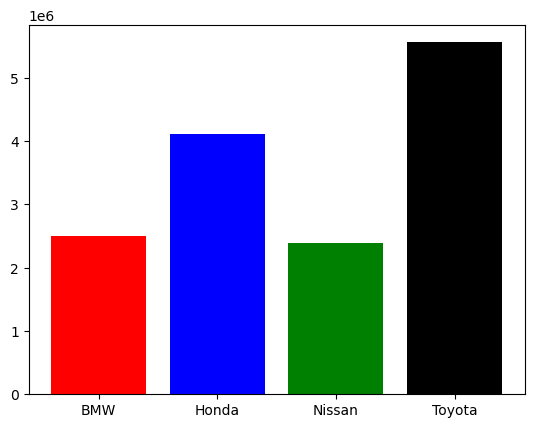

In [21]:
plt.bar(height= total.Price, x=total.index, color=total.bar_color)
plt.show()

## Legends

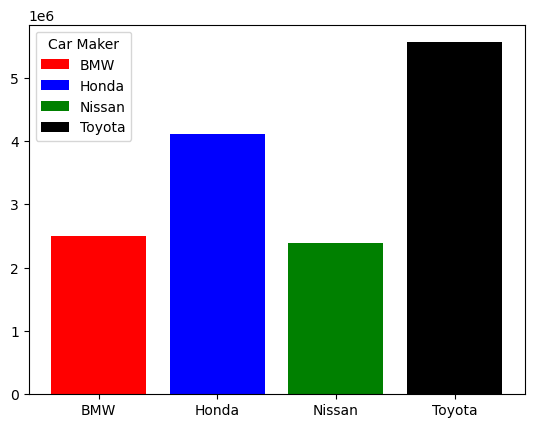

In [24]:
fig, ax = plt.subplots()

plt.bar(height= total.Price, x=total.index, color=total.bar_color, label=total.index)
ax.legend(title="Car Maker")
plt.show()

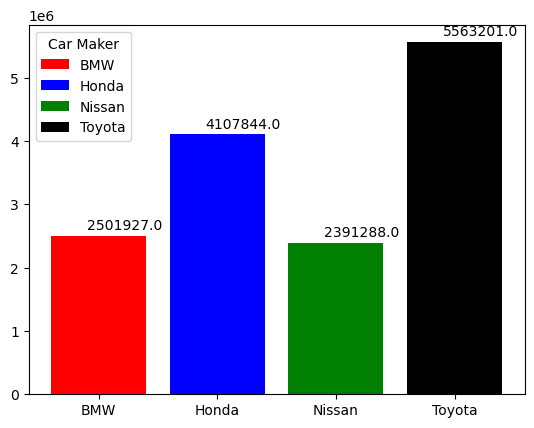

In [48]:
fig, ax = plt.subplots()

plt.bar(height= total.Price, x=total.index, color=total.bar_color, label=total.index)
ax.legend(title="Car Maker")

for index, value in enumerate(total.Price):
    plt.text(index-0.1, value+100_000, str(value))

plt.show()



# Histrogram

In [51]:
data[["Price"]]

,Price
0,15323.0
1,19943.0
2,28343.0
3,13434.0
4,14043.0
...,...
995,32042.0
996,5716.0
997,31570.0
998,4001.0


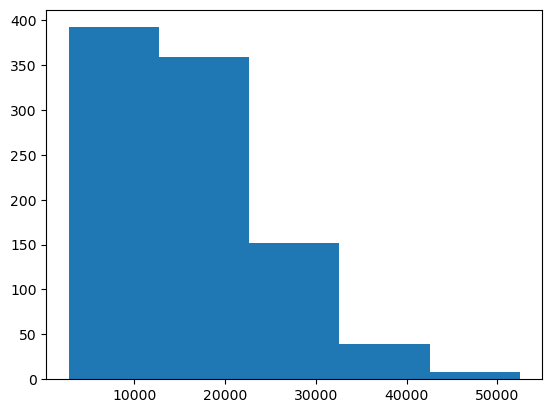

In [78]:
plt.hist(data["Price"], bins=5)
plt.show()

In [59]:
price_range =  data[["Price"]].copy()
price_range

,Price
0,15323.0
1,19943.0
2,28343.0
3,13434.0
4,14043.0
...,...
995,32042.0
996,5716.0
997,31570.0
998,4001.0


In [73]:
ranges = []
for price in price_range["Price"]:
    if(price<10_000):
        ranges.append("Low")
    elif price<30_000:
        ranges.append("Medium")
    else:
        ranges.append("High")
price_range["Price Range"] = ranges
price_range.head()

,Price,Price Range
0,15323.0,Medium
1,19943.0,Medium
2,28343.0,Medium
3,13434.0,Medium
4,14043.0,Medium


In [74]:
total_ranges = price_range.groupby("Price Range").sum()
total_ranges

,Price
Price Range,
High,2458544.0
Low,1829698.0
Medium,10952432.0


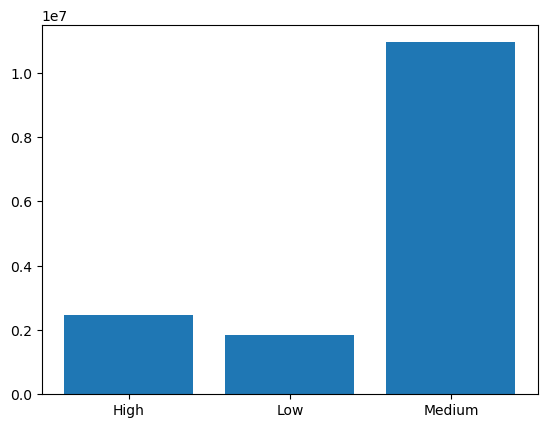

In [75]:
plt.bar(total_ranges.index, total_ranges["Price"])
plt.show()

# Scatterplt (compare relationship between numbers)

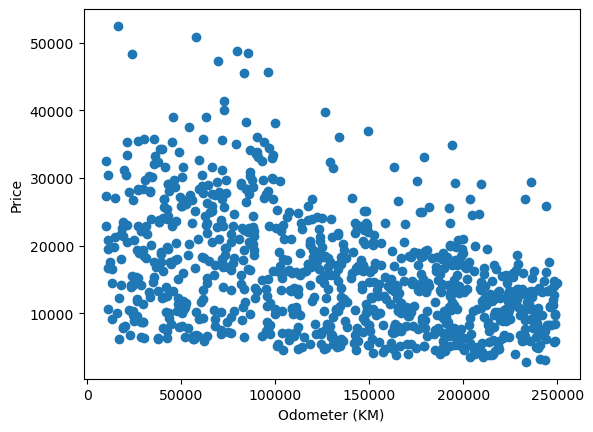

In [135]:
sample = data[["Odometer (KM)", "Price"]].sample(frac=1)
fig, ax = plt.subplots()
plt.scatter(x=sample["Odometer (KM)"], y=sample["Price"])

ax.set_xlabel("Odometer (KM)")
ax.set_ylabel("Price")
plt.show()

## Add Line 

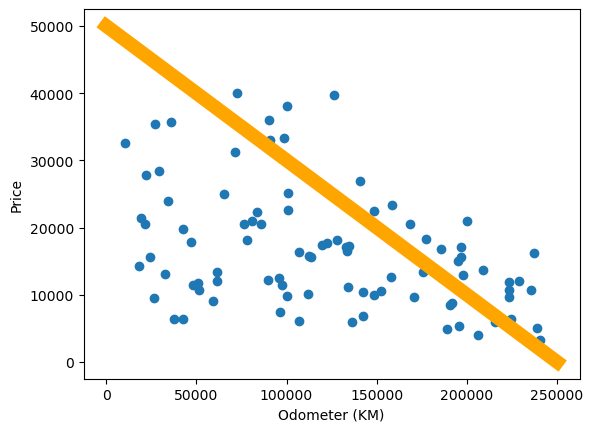

In [136]:
sample = data[["Odometer (KM)", "Price"]].sample(frac=0.1)
fig, ax = plt.subplots()
x = np.array([0, 250000])  # X-axis points
y = np.array([50000, 0])   # Y-axis points
plt.plot(x, y, color="orange", linewidth=10)  # Plot the chart
plt.scatter(x=sample["Odometer (KM)"], y=sample["Price"])

ax.set_xlabel("Odometer (KM)")
ax.set_ylabel("Price")
plt.show()

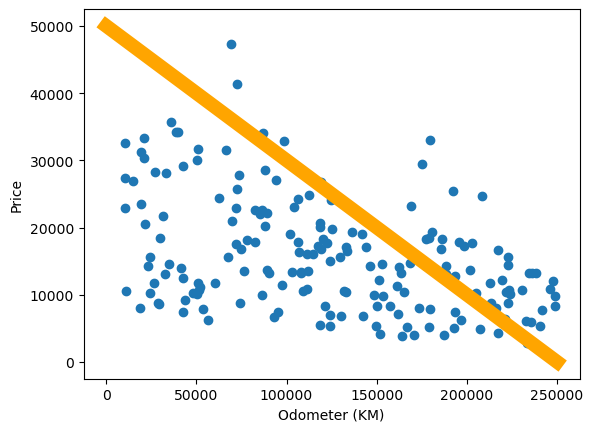

In [117]:
sample = data[["Odometer (KM)", "Price"]].sample(frac=0.2)
fig, ax = plt.subplots()
x = np.array([0, 250000])  # X-axis points
y = np.array([50000, 0])   # Y-axis points
plt.plot(x, y, color="orange", linewidth=10)  # Plot the chart
plt.scatter(x=sample["Odometer (KM)"], y=sample["Price"])

ax.set_xlabel("Odometer (KM)")
ax.set_ylabel("Price")
plt.show()

In [130]:
sample = data[["Odometer (KM)", "Price", "Make"]].sample(frac=0.5)
sample

,Odometer (KM),Price,Make
326,232912.0,6029.0,Toyota
111,82726.0,17802.0,Nissan
327,130817.0,31392.0,BMW
47,243969.0,16138.0,Toyota
227,79301.0,35004.0,BMW
...,...,...,...
322,165301.0,10429.0,Toyota
331,112292.0,24834.0,Toyota
571,123924.0,21236.0,Honda
407,172266.0,18327.0,Honda


## Add Colours

In [131]:
toyota_sample = sample[sample["Make"] == "Toyota"]
toyota_sample

,Odometer (KM),Price,Make
326,232912.0,6029.0,Toyota
47,243969.0,16138.0,Toyota
373,112223.0,4753.0,Toyota
294,20985.0,33353.0,Toyota
177,38544.0,34286.0,Toyota
...,...,...,...
429,188658.0,14312.0,Toyota
762,147230.0,16645.0,Toyota
391,177571.0,14318.0,Toyota
322,165301.0,10429.0,Toyota


In [132]:
bmw_sample = sample[sample["Make"] == "BMW"]
bmw_sample

,Odometer (KM),Price,Make
327,130817.0,31392.0,BMW
227,79301.0,35004.0,BMW
740,11049.0,19500.0,BMW
65,178796.0,18396.0,BMW
909,232696.0,26940.0,BMW
664,38775.0,NaN,BMW
866,118286.0,14145.0,BMW
953,102773.0,29551.0,BMW
753,NaN,30020.0,BMW
584,96224.0,45720.0,BMW


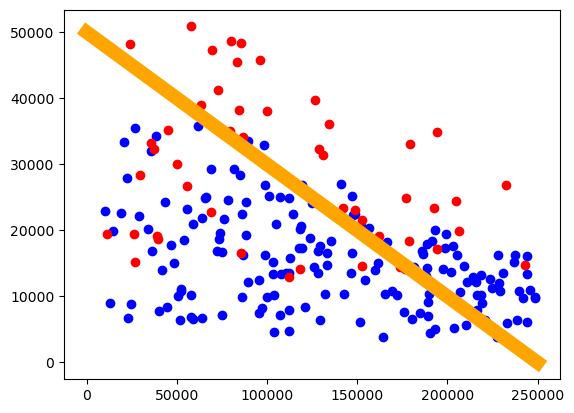

In [134]:
plt.scatter(x=toyota_sample["Odometer (KM)"], y=toyota_sample["Price"], color="blue")
plt.scatter(x=bmw_sample["Odometer (KM)"], y=bmw_sample["Price"], color="red")

x = np.array([0, 250000])  # X-axis points
y = np.array([50000, 0])   # Y-axis points
plt.plot(x, y, color="orange", linewidth=10)  # Plot the chart
ax.set_xlabel("Odometer (KM)")
ax.set_ylabel("Price")
plt.show()

## Add legends

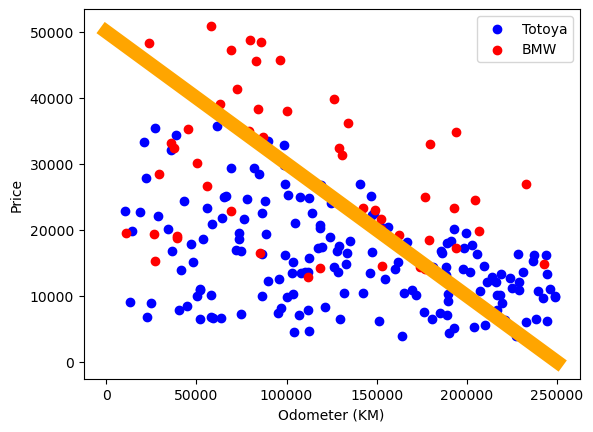

In [141]:
fig, ax = plt.subplots()

plt.scatter(x=toyota_sample["Odometer (KM)"], y=toyota_sample["Price"], color="blue", label="Totoya")
plt.scatter(x=bmw_sample["Odometer (KM)"], y=bmw_sample["Price"], color="red", label="BMW")

x = np.array([0, 250000])  # X-axis points
y = np.array([50000, 0])   # Y-axis points
plt.plot(x, y, color="orange", linewidth=10)  # Plot the chart
ax.set_xlabel("Odometer (KM)")
ax.set_ylabel("Price")
ax.legend()
plt.show()

# Line Chart

In [153]:
lemon = pd.read_csv("Lemonade.csv")
lemon.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18


In [155]:
lemon["ParseDate"] = pd.to_datetime( lemon["Date"], format="%d/%m/%Y")

In [156]:
lemon.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,ParseDate
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10,2017-01-01
1,02/01/2017,Monday,28.9,1.33,15,0.3,13,2017-01-02
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15,2017-01-03
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17,2017-01-04
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18,2017-01-05


In [157]:
lemon.dtypes

Date                   object
Day                    object
Temperature           float64
Rainfall              float64
Flyers                  int64
Price                 float64
Sales                   int64
ParseDate      datetime64[ns]
dtype: object

In [166]:
lemon["YearMonth"] = lemon.ParseDate.dt.to_period("M")
lemon.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,ParseDate,YearMonth
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10,2017-01-01,2017-01
1,02/01/2017,Monday,28.9,1.33,15,0.3,13,2017-01-02,2017-01
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15,2017-01-03,2017-01
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17,2017-01-04,2017-01
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18,2017-01-05,2017-01


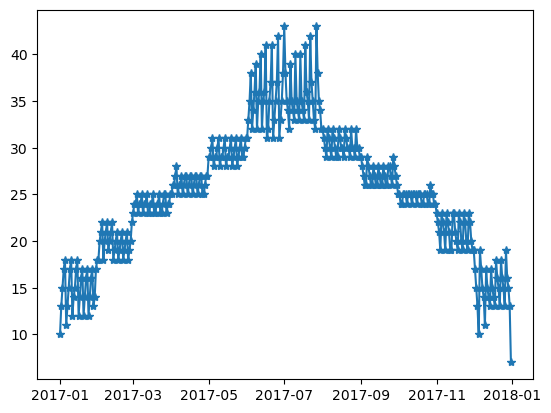

In [177]:
plt.plot(lemon.ParseDate, lemon.Sales, '*-')
plt.show()

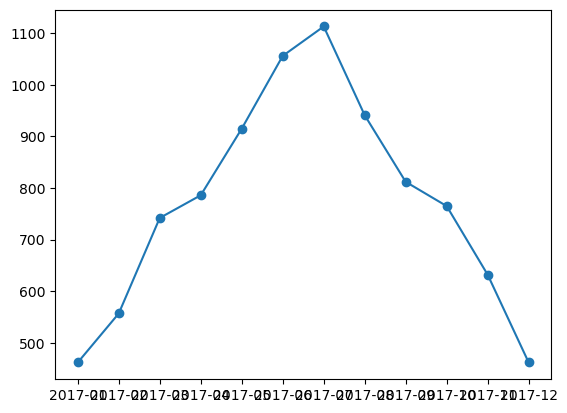

In [176]:
ym_data = lemon[["YearMonth", "Sales"]].groupby("YearMonth").sum()
plt.plot(ym_data.index.astype(str), ym_data.Sales, 'o-')
plt.show()